<img src="Images/aiwithai.png" width="100%">

## Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale

There are several Feature Scaling techniques,

- Standardisation
- MinMaxScaling - Scaling to minimum and maximum values
- Mean normalisation
- MaxAbsScaling - Scaling to maximum value 
- RobustScaling - Scaling to quantiles and median
  
=================================================================

### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)

## Standardisation


Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution.
**standardising a variable does not normalize the distribution of the data** 

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

In [2]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. 

Note that **the mean values are not centered at zero, and the standard deviations are not scaled to 1**.

When standardising the data set, we need to first identify the mean and standard deviation of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

### Standardisation

The StandardScaler from scikit-learn removes the mean and scales the data to unit variance. Plus, it learns and stores the parameters needed for scaling. Thus, it is top choice for this feature scaling technique.

On the downside, you can't select which variables to scale directly, it will scale the entire data set.

In [5]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([ 3.86666741e+00,  2.86187016e+01,  5.42340368e+00,  1.09477484e+00,
        1.42515732e+03,  3.04051776e+00,  3.56300934e+01, -1.19566647e+02])

In [7]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([1.89109236e+00, 1.25962585e+01, 2.28754018e+00, 4.52736275e-01,
       1.14954037e+03, 6.86792905e+00, 2.14004647e+00, 2.00651732e+00])

In [8]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.78,-2.19,-2.00,-1.68,-1.24,-0.33,-1.44,-2.38
25%,-0.69,-0.84,-0.42,-0.20,-0.56,-0.09,-0.79,-1.11
50%,-0.17,0.03,-0.08,-0.10,-0.23,-0.03,-0.64,0.54
75%,0.46,0.67,0.27,0.01,0.26,0.03,0.97,0.78
max,5.89,1.86,55.57,72.83,29.80,86.88,2.95,2.62


As expected, the mean of each variable is now centered at zero and the standard deviation is 1. 

Note that the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers.

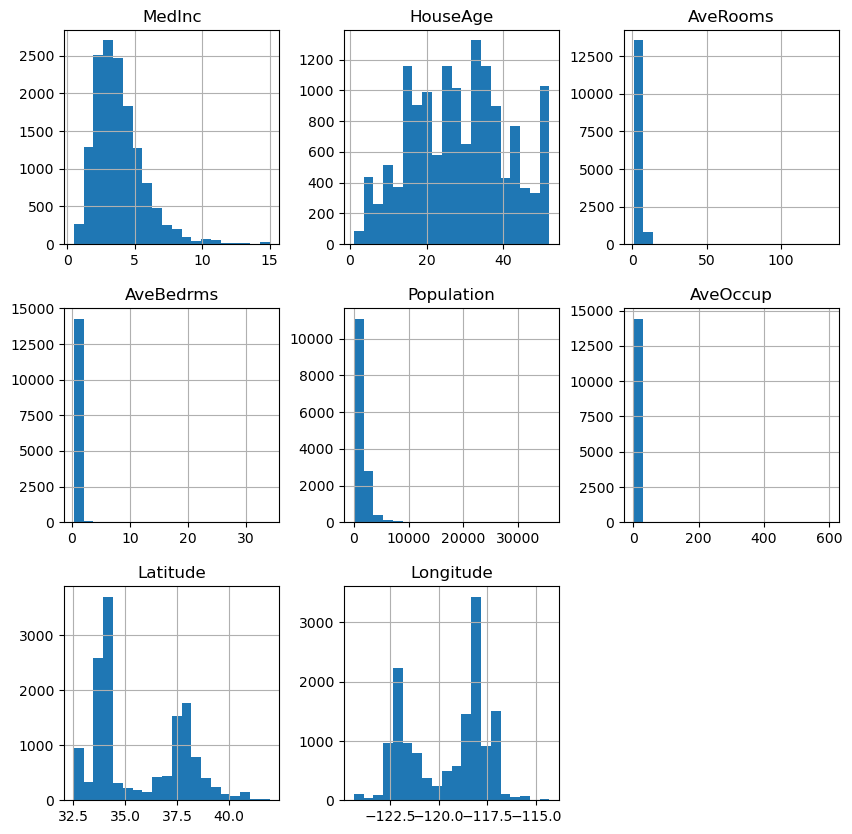

In [9]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

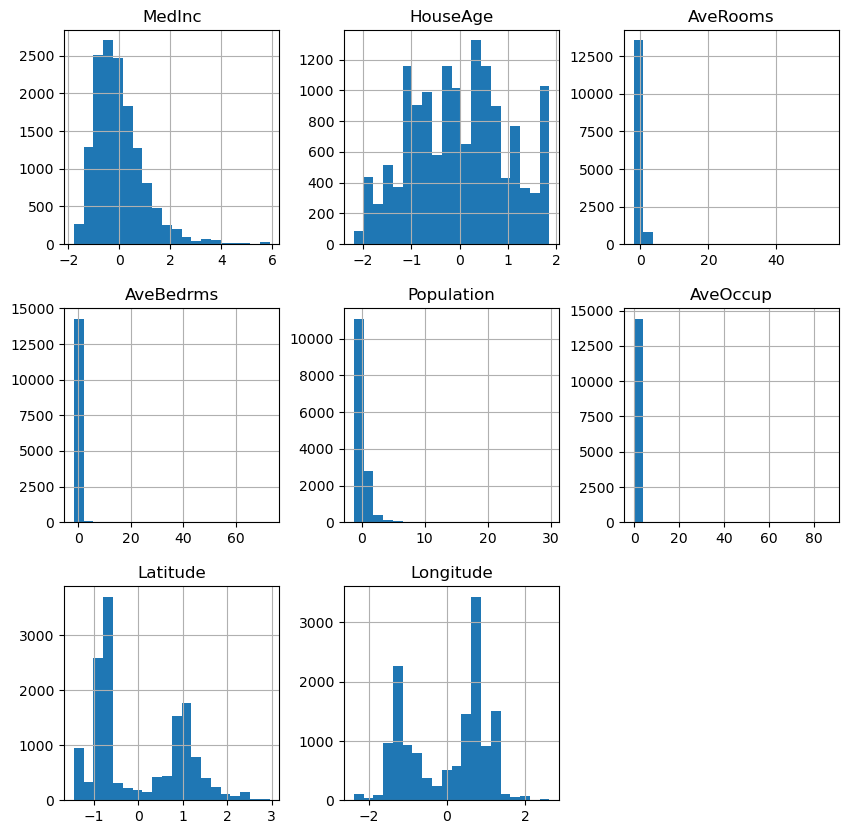

In [10]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

Note from the above plots how standardisation centered all the distributions at zero, but it preserved their original distribution.

## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)


The result of the above transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shape of a min-max scaled distribution will be similar to the original variable. This scaling technique is also sensitive to outliers.

In a nutshell, MinMaxScaling:

- the minimum and maximum values are 0 and 1.
- does not center the mean at 0
- variance varies across variables
- sensitive outliers

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# dataset for the demo
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [17]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [18]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. 

Note that **the minimum and maximum values are are quite different in the different variables**.

When performing min-max scaling on the data set, we need to first identify the minimum and maximum values of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [19]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

### MinMaxScaling

The MinMaxScaler from scikit-learn subtracts the minimum value and re-scales the the value range, rendering the variable values between 0 and 1. 

In [20]:
# set up the scaler
scaler = MinMaxScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# the scaler stores the maximum values of the features, learned from train set

scaler.data_max_

array([ 1.50001000e+01,  5.20000000e+01,  1.32533333e+02,  3.40666667e+01,
        3.56820000e+04,  5.99714286e+02,  4.19500000e+01, -1.14310000e+02])

In [22]:
# tthe scaler stores the minimum values of the features, learned from train set

scaler.min_

array([-3.44753865e-02, -1.96078431e-02, -6.42548386e-03, -9.88142292e-03,
       -8.40830741e-05, -1.25216147e-03, -3.45802338e+00,  1.23854582e+01])

In [23]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([1.45002000e+01, 5.10000000e+01, 1.31687179e+02, 3.37333333e+01,
       3.56790000e+04, 5.98964286e+02, 9.41000000e+00, 1.00400000e+01])

In [24]:
# let's check the stats of the scaled data:

X_train_scaled.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00,14448.00
mean,0.23,0.54,0.03,0.02,0.04,0.00,0.33,0.48
std,0.13,0.25,0.02,0.01,0.03,0.01,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.33,0.03,0.02,0.02,0.00,0.15,0.25
50%,0.21,0.55,0.03,0.02,0.03,0.00,0.18,0.58
75%,0.29,0.71,0.04,0.02,0.05,0.00,0.55,0.63
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


As expected, the minimum and maximum values for all the variables are 0 and 1, respectively. The mean is not centered at zero, and the variance changes.

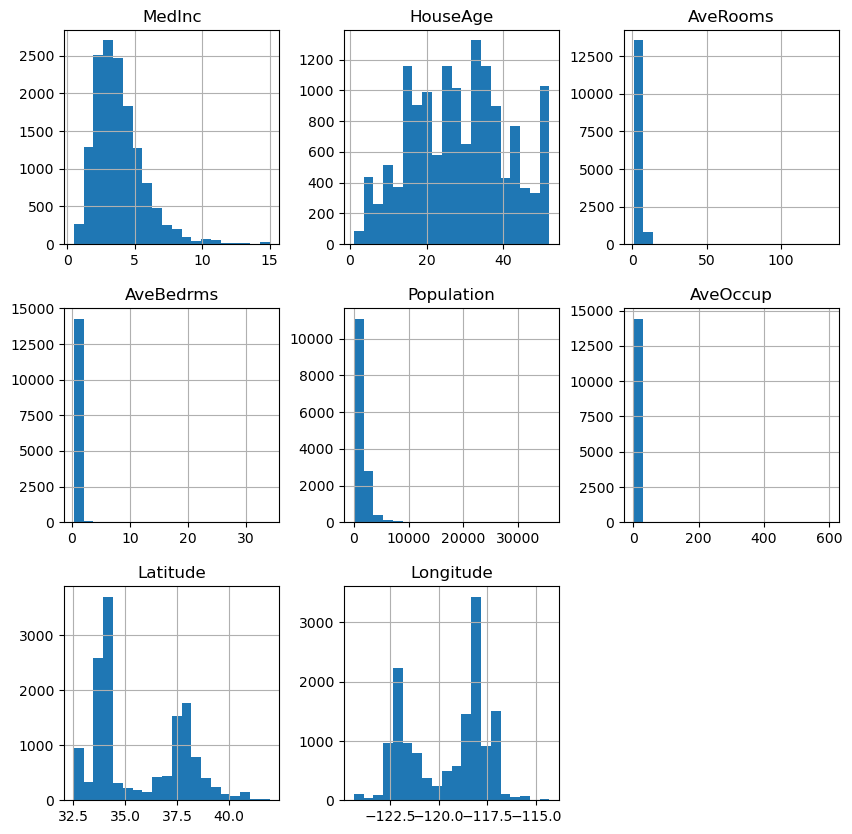

In [25]:
# Distribution before scaling:

X_train.hist(bins=20, figsize=(10,10))
plt.show()

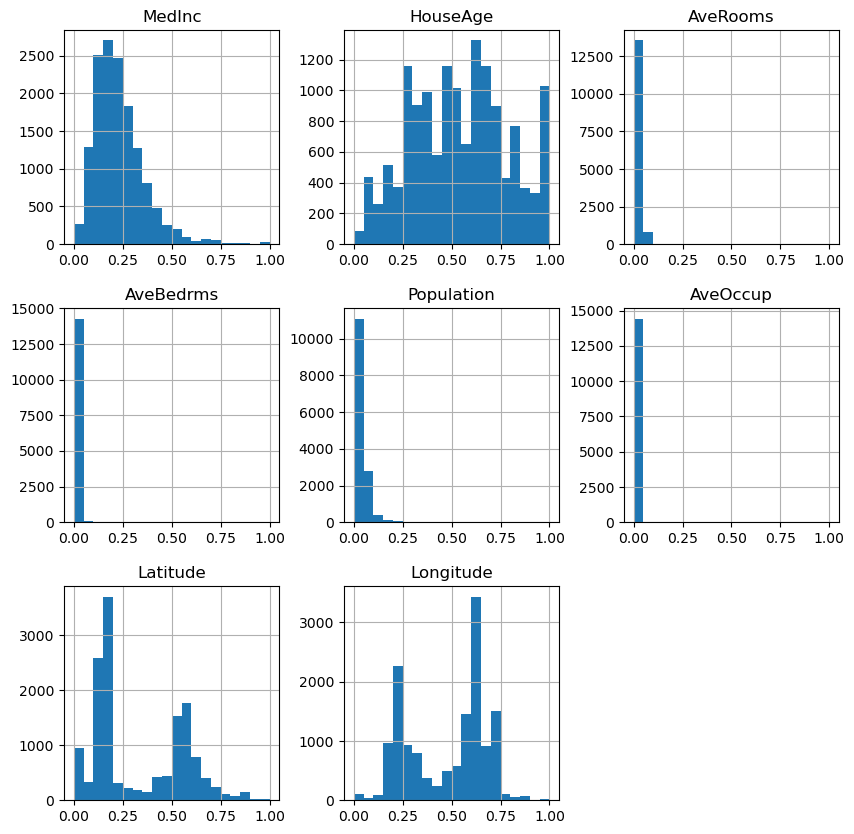

In [26]:
# Distribution after scaling:

X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

The minimum and maximum values are different, but the shape of the distribution is similar.

# Application on Real Data using Wine Dataset

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/wine.data', header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [30]:
df["Class label"].unique()

array([1, 2, 3], dtype=int64)

### Apply standadization 

In [31]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

In [32]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


### MinMaxScaler

In [33]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [34]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


## Plotting 

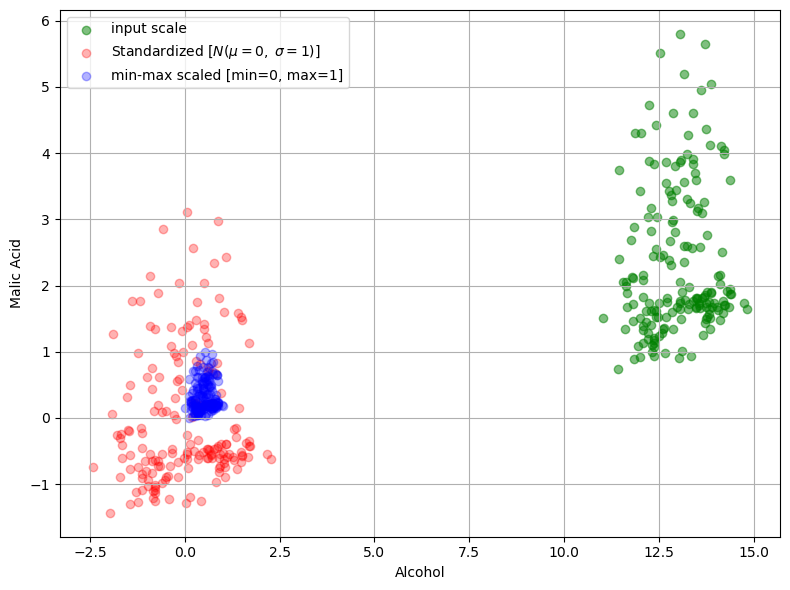

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title="Alcohol and Malic Acid content of the wine dataset"
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()